Student Information<br>
Name:林靖淵 <br>
Student ID:113356040<br>
GitHub ID: <br>

---


Instructions
1. First: do the take home exercises in the DM2024-Lab1-Master. You may need to copy some cells from the Lab notebook to this notebook. This part is worth **20%** of your grade.
2. Second: follow the same process from the DM2024-Lab1-Master on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth **30%** of your grade.
Download the the new dataset. The dataset contains a sentiment and comment columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.
3. Third: please attempt the following tasks on the new dataset. This part is worth **30%** of your grade.
- Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
- Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to
this Scikit-learn guide .
- Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might
need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. Refer to this article.
4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent
parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth **10%** of your grade.
5. Fifth: It's hard for us to follow if your code is messy, so please tidy up your notebook and add minimal comments where needed. This part is worth **10%** of your grade.
You can submit your homework following these guidelines: Git Intro & How to hand your homework. Make sure to commit and save your changes to your repository BEFORE the deadline (October 27th 11:59 pm, Sunday).


## **First: Take Home exercise**

In [5]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

In [6]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
type(twenty_train)

sklearn.utils._bunch.Bunch

In [8]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### **>>> Exercise 2 (take home)**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [9]:
X.index
X.columns
X.dtypes
X.info  # print a concise summary of a dataframe
X.select_dtypes(include='object')  # 根據 dtype 選擇column
X.values # Only the values in the DataFrame will be returned, the axes labels will be removed
X.describe  # 顯示資料的基本統計信息
X.shape  # 顯示資料的行數和列數
X.head(5)  # 顯示前五筆資料
X.tail(5)  # 顯示後五筆資料
X.drop(columns = ['category'])  #刪除指定列
X.merge(X, on='category')  # 將兩個dataframe按照指定列合併

text_x  category  \
0        From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1        From: sd345@city.ac.uk (Michael Collier) Subje...         1   
2        From: sd345@city.ac.uk (Michael Collier) Subje...         1   
3        From: sd345@city.ac.uk (Michael Collier) Subje...         1   
4        From: sd345@city.ac.uk (Michael Collier) Subje...         1   
...                                                    ...       ...   
1283088  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
1283089  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
1283090  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
1283091  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
1283092  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

        category_name_x                                             text_y  \
0         comp.graphics  From: sd345@city.ac.uk (Michael Collier) Subje...   
1         comp.graphics  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...   
2         comp.graphics  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...   
3         comp.graphics  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...   
4         comp.graphics  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...   
...                 ...                                                ...   
1283088         sci.med  From: roos@Operoni.Helsinki.FI (Christophe Roo...   
1283089         sci.med  From: mhollowa@ic.sunysb.edu (Michael Holloway...   
1283090         sci.med  From: sasghm@theseus.unx.sas.com (Gary Merrill...   
1283091         sci.med  From: Dan Wallach <dwallach@cs.berkeley.edu> S...   
1283092         sci.med  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...   

        category_name_y  
0         comp.graphics  
1         comp.graphics  
2         comp.graphics  
3         comp.graphics  
4         comp.graphics  
...                 ...  
1283088         sci.med  
1283089         sci.med  
1283090         sci.med  
1283091         sci.med  
1283092         sci.med  

[1283093 rows x 5 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here
'','NaN','None' are string, they don't equal to NaN, None or missing value.
Here is the explanation from document: NA values, such as None or numpy.NaN, gets mapped to True values.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [17]:
X_sample = X.sample(n=1000) #random state
X_sample[:10]

text  category  \
665   From: george@ccmail.larc.nasa.gov (George M. B...         1   
855   Subject: Re: Bates Method for Myopia From: jc@...         2   
1049  From: turpin@cs.utexas.edu (Russell Turpin) Su...         2   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
1691  From: noye@midway.uchicago.edu (vera shanti no...         3   
80    From: annick@cortex.physiol.su.oz.au (Annick A...         2   
1365  From: Petch@gvg47.gvg.tek.com (Chuck Petch) Su...         3   
2131  From: dpw@sei.cmu.edu (David Wood) Subject: Re...         0   
1228  From: tdawson@llullaillaco.engin.umich.edu (Ch...         1   
346   From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0   

               category_name  
665            comp.graphics  
855                  sci.med  
1049                 sci.med  
2232           comp.graphics  
1691  soc.religion.christian  
80                   sci.med  
1365  soc.religion.christian  
2131             alt.atheism  
1228           comp.graphics  
346              alt.atheism

In [16]:
X[:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### Answer here
The order of records may not be same as in the origin dataframe. The index is not ordered. Everytime I run the code for sampling, the results are different while X[:10] always the same.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

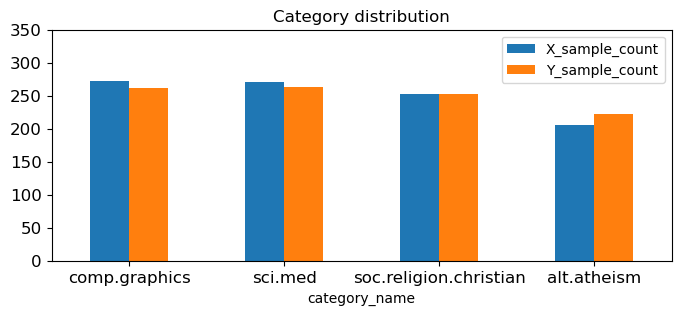

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
X_sample = X.sample(1000).category_name.value_counts()
Y_sample = X.sample(1000).category_name.value_counts()
combined_df = pd.concat([X_sample, Y_sample], axis=1)
combined_df.columns = ['X_sample_count', 'Y_sample_count']
combined_df.plot(kind = 'bar',
                 title = 'Category distribution',
                 ylim = [0, 350], 
                 rot = 0, fontsize = 12, figsize = (8,3),)
plt.show()

---

In [22]:
import nltk
# takes a like a minute or two to process
nltk.download('punkt_tab')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\JIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
for i,t in enumerate(X_counts[4,0:100].toarray()[0]):
    if t == 1:
        print(count_vect.get_feature_names_out()[i:i+1])

['00']
['01']


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

(100, 26)


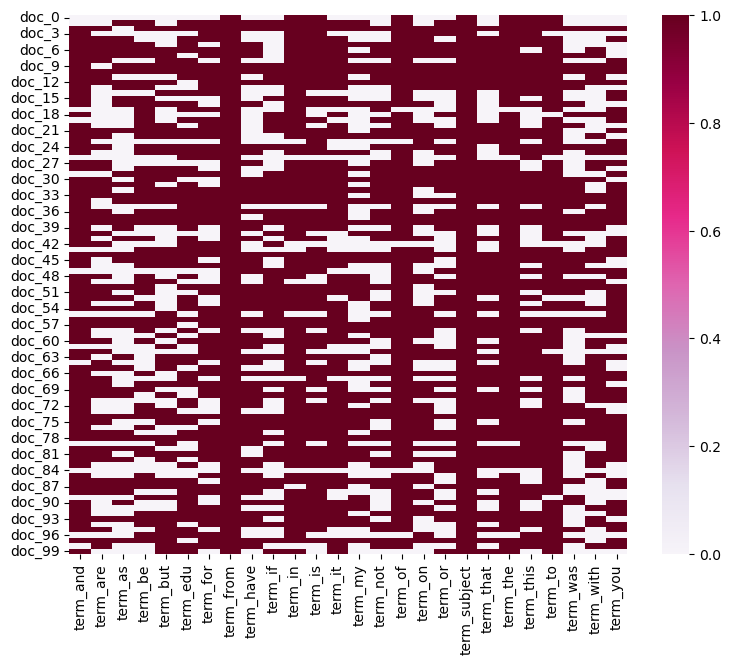

In [30]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:100]]
plot_z = X_counts[:100, :].toarray() #X_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

df_sum = df_todraw.sum(axis=0)
# 保留 1 的總數大於等於 100 的列
df_filtered = df_todraw.loc[:, df_sum >= 100]
print(df_filtered.shape)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_filtered,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)
plt.show()

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

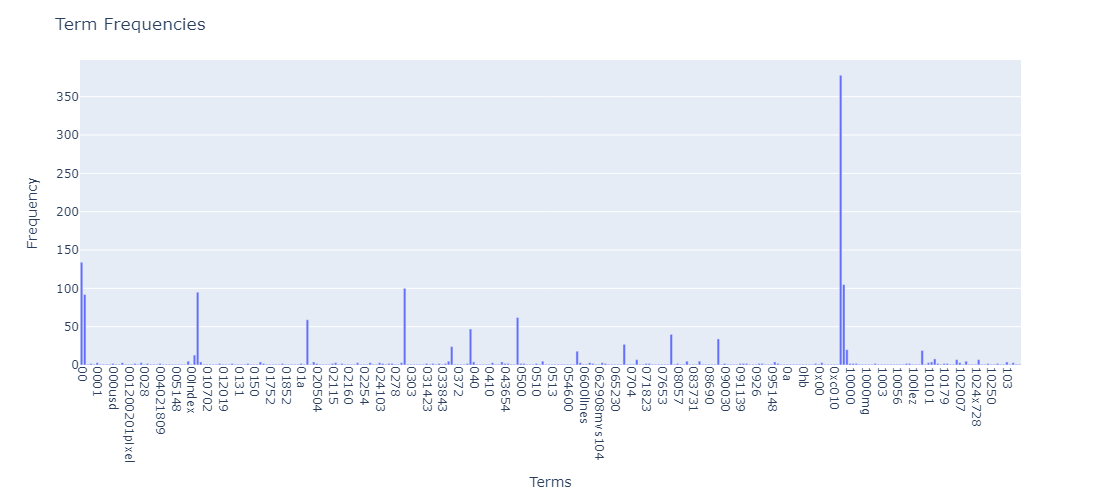

In [32]:
import plotly.express as px
import pandas as pd

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Create a DataFrame to organize the data
df = pd.DataFrame({
    'Term': terms,
    'Frequency': frequencies
})

fig = px.bar(df, x='Term', y='Frequency')

fig.update_layout(
    xaxis_tickangle=90,  # Rotate x-axis labels
    height=500,  # Set figure height
    width=1200,  # Set figure width
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [33]:
df_sum = df_todraw.sum(axis=0)
df_filtered = df_todraw.loc[:, df_sum >= 100]
df_filtered_sum = df_filtered.sum(axis=0)
# Series convert to df for next step input
df_plot = pd.DataFrame({
    'Term': df_filtered_sum.index,      # Term names as index
    'Frequency': df_filtered_sum.values  # Frequencies as values
})

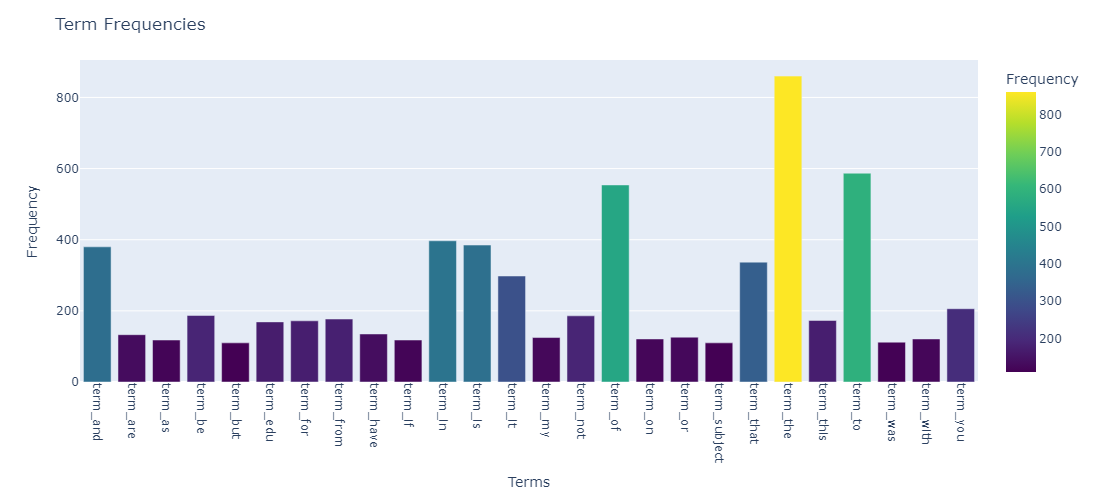

In [34]:
fig = px.bar(df_plot, x="Term", y='Frequency',color="Frequency",  # Assign color based on frequency values
             color_continuous_scale="Viridis")

# Update layout (rotating labels, sizing, etc.)
fig.update_layout(
    xaxis_tickangle=90,  # Rotate x-axis labels
    height=500,  # Set figure height
    width=1200,  # Set figure width
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

fig.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

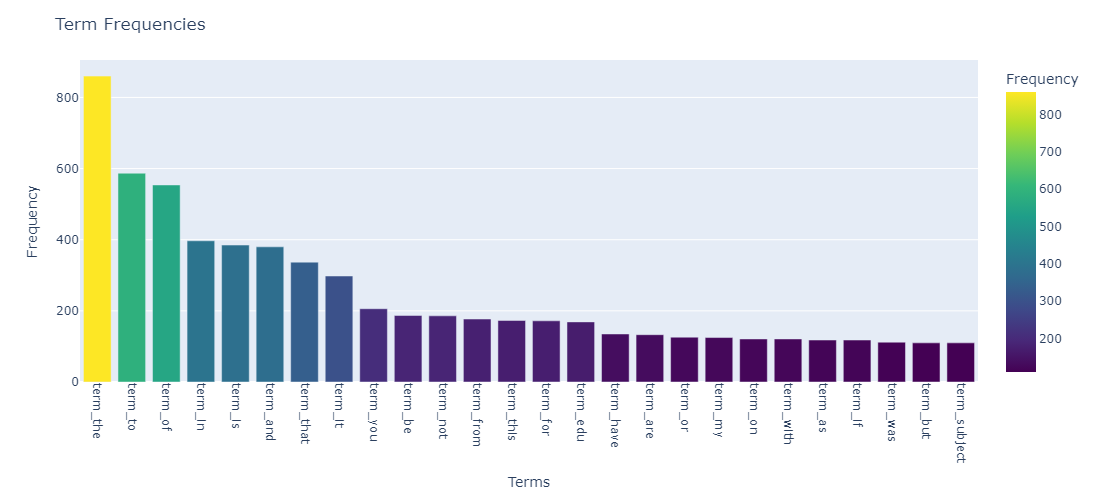

In [35]:
df_filtered_sum_sorted = df_filtered_sum.sort_values(ascending=False)

df_plot = pd.DataFrame({
    'Term': df_filtered_sum_sorted.index,      # Term names as index
    'Frequency': df_filtered_sum_sorted.values # Frequencies as values
})

fig = px.bar(df_plot, x="Term", y='Frequency',color="Frequency",  # Assign color based on frequency values
             color_continuous_scale="Viridis")

# Update layout (rotating labels, sizing, etc.)
fig.update_layout(
    xaxis_tickangle=90,  # Rotate x-axis labels
    height=500,  # Set figure height
    width=1200,  # Set figure width
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

fig.show()


***

C:\Users\JIN\AppData\Local\Temp\ipykernel_32944\240477828.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



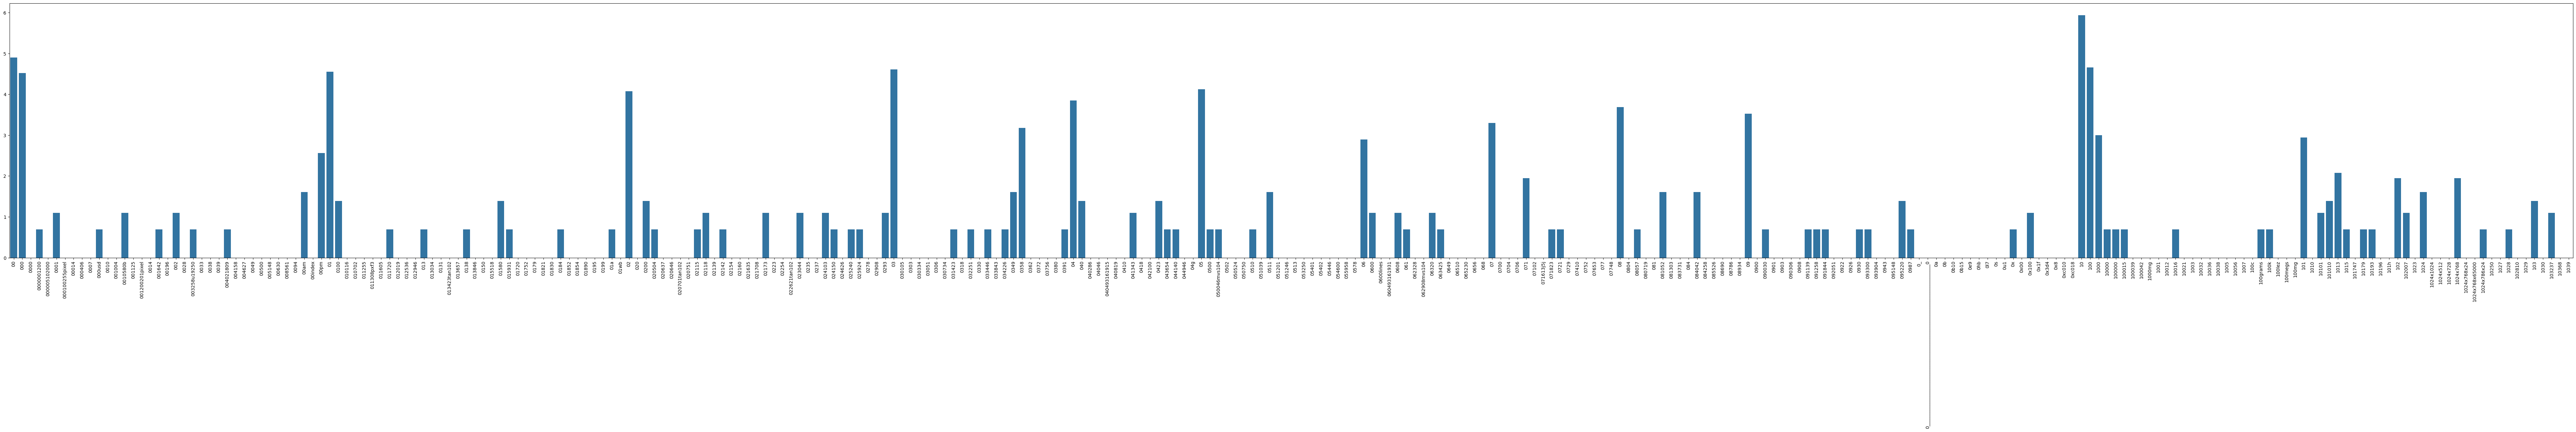

In [37]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

---

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

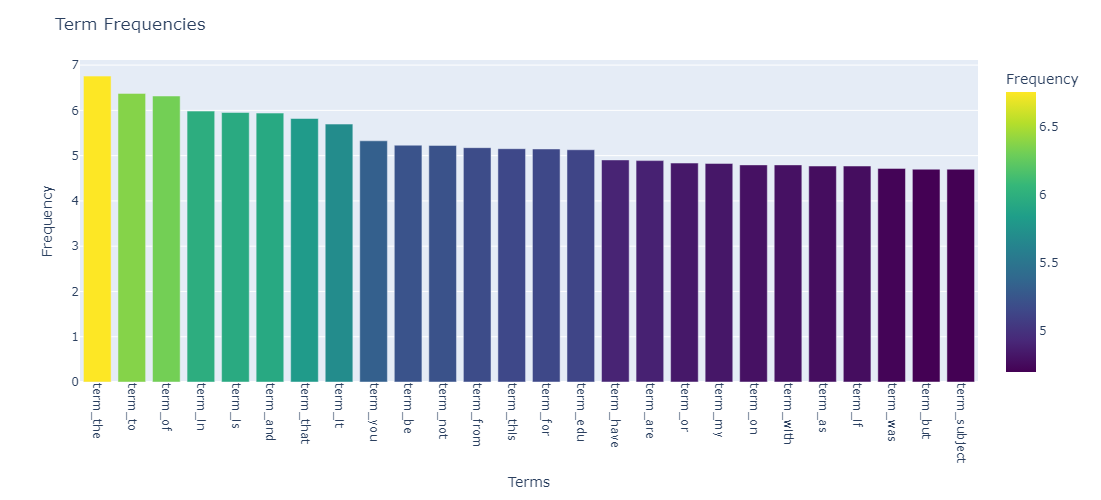

In [38]:
df_filtered_sum_sorted = df_filtered_sum.sort_values(ascending=False)

df_plot = pd.DataFrame({
    'Term': df_filtered_sum_sorted.index,      # Term names as index
    'Frequency': np.log(df_filtered_sum_sorted) # Frequencies as values
})

fig = px.bar(df_plot, x="Term", y='Frequency',color="Frequency",  # Assign color based on frequency values
             color_continuous_scale="Viridis")

# Update layout (rotating labels, sizing, etc.)
fig.update_layout(
    xaxis_tickangle=90,  # Rotate x-axis labels
    height=500,  # Set figure height
    width=1200,  # Set figure width
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

fig.show()

---

In [39]:
#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

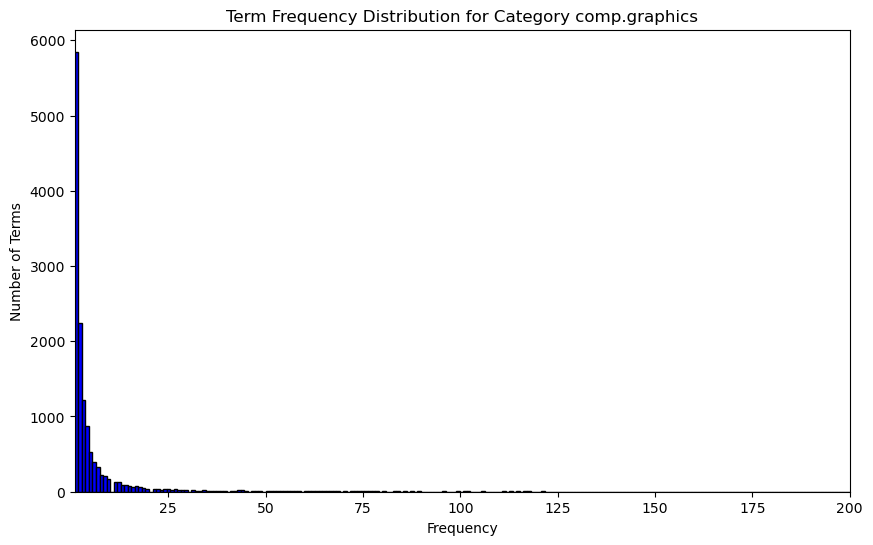

In [43]:
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [47]:
category_number=1 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_1_percent_index = int(0.01 * total_terms)

# Get the indices of the top 5% most frequent terms
top_1_percent_indices = sorted_indices[:top_1_percent_index]

# Filter terms that belong to the top 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 1%: {top_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: soc.religion.christian
Number of terms in top 1%: 138
Filtered terms: ['acknowleding', 'angelino', 'angelic', 'danj', 'angel', 'anew', 'danket', 'dap', 'daphne', 'dar', 'anecdote', 'angered', 'dare', 'andromeda', 'daring', 'andrews', 'darkly', 'darkstar', 'andrea', 'andre_beck', 'darn', 'darnell', 'andes', 'andy', 'anderson', 'angering', 'danielg', 'dana', 'annals', 'ann', 'anl', 'aniruddha', 'dandruff', 'animator', 'animation', 'danebury', 'animates', 'danielle', 'animated', 'animal', 'dang', 'anh', 'angulated', 'anguish', 'danger', 'dangerous', 'dangers_', 'dangling', 'daniel', 'animate', 'annee', 'andersom', 'ancyra', 'analogy', 'analogues', 'dat', 'database', 'anabolic', 'an', 'amusing', 'amusement', 'amused', 'amugw', 'dassow', 'datahand', 'amr', 'amplify', 'amplifications', 'amplification', 'dataman', 'datapoints', 'amphiboly', 'datas', 'amounts', 'amos', 'amro', 'darpa', 'analysed', 'analysts', 'ancient', 'anchored', 'anchor', 'ancestry', 'ancestor', 'ance', 'darwin', 

---

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

# Answer here
Most of the prefixes are concentrated in the range of A-C, with few words starting with other letters. 
Additionally, some lists contain domain-specific terms. e.g. "analgesic", "adenoma", "circulatory" relate to biology

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [48]:
import PAMI.frequentPattern.topk.FAE as alg
n=1
while n < 4:
    k = 500*n
    n+=1
    obj3 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
    obj3.mine()
    frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
    print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime


 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 2.0929715633392334
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 4.575816869735718
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 10.003072023391724


In [49]:
obj3.save('freq_patterns_comp_graphics_FAE.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0                                                 maybe       26
1                                                  life       24
2                                                 ideas       24
3                                                  feel       24
4                                                 tried       24
...                                                 ...      ...
1495  awful discussing favor proposed learn personal...       12
1496  discussing favor proposed learn personally fee...       12
1497  convenience discussing favor proposed learn pe...       12
1498  discussing favor proposed learn personally fee...       12
1499  discussing favor proposed learn personally fee...       12

[1500 rows x 2 columns]

In [50]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
n=1
while n<4:
    obj3 = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv',minSup=3*n)
    obj3.mine()
    frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
    print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime
    n+=1

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6872
Runtime: 39.97938275337219
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 1340
Runtime: 0.5635309219360352
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.2173328399658203


In [51]:
obj3.save('freq_patterns_comp_graphics_MaxFPGrowth.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0                    tim         9
1                 option         9
2          rumours 68070         9
3                   chip         9
4    rumours mcmains unt         9
..                    ...      ...
655                wrong        23
656                tried        24
657                ideas        24
658                 life        24
659                maybe        26

[660 rows x 2 columns]

### Answer here
FPGrowth is the go-to algorithm when the goal is to extract all frequent patterns above a given support threshold.FAE Top-K is used when the number of required patterns is fixed, offering faster results by focusing on the top-K patterns.MaxFPGrowth is beneficial when only the most comprehensive frequent patterns are desired, reducing redundancy and providing a more compact result.As the result observeed above, comparing to FPGrowth, MAxFPGrowth has lower runtimes when running higher minSup. And these two methods result is quite similar.FAE Top-K has completely different result to FPGrowth and MaxFPGrowth. It has more series frenquecy.

---

In [56]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")


                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [58]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

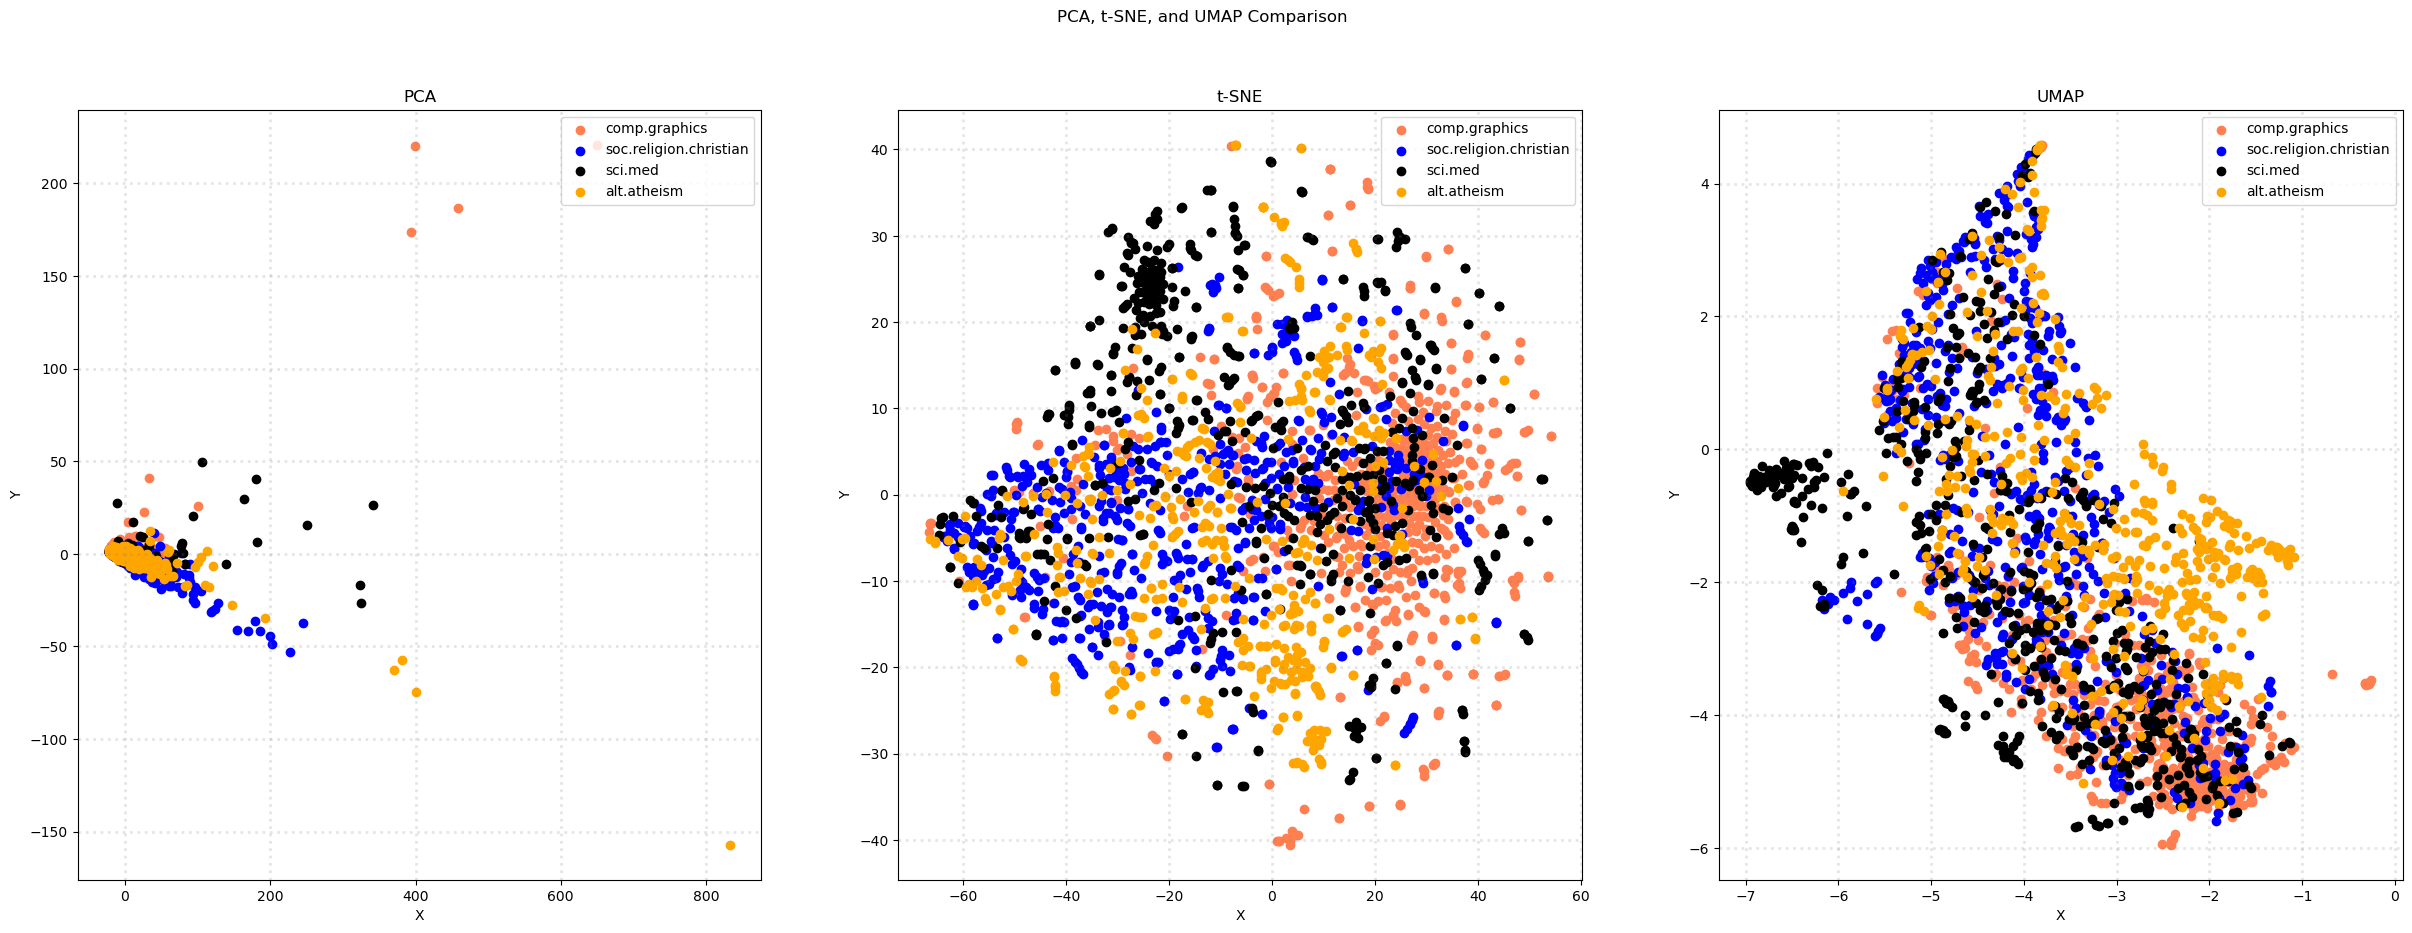

In [60]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

---

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

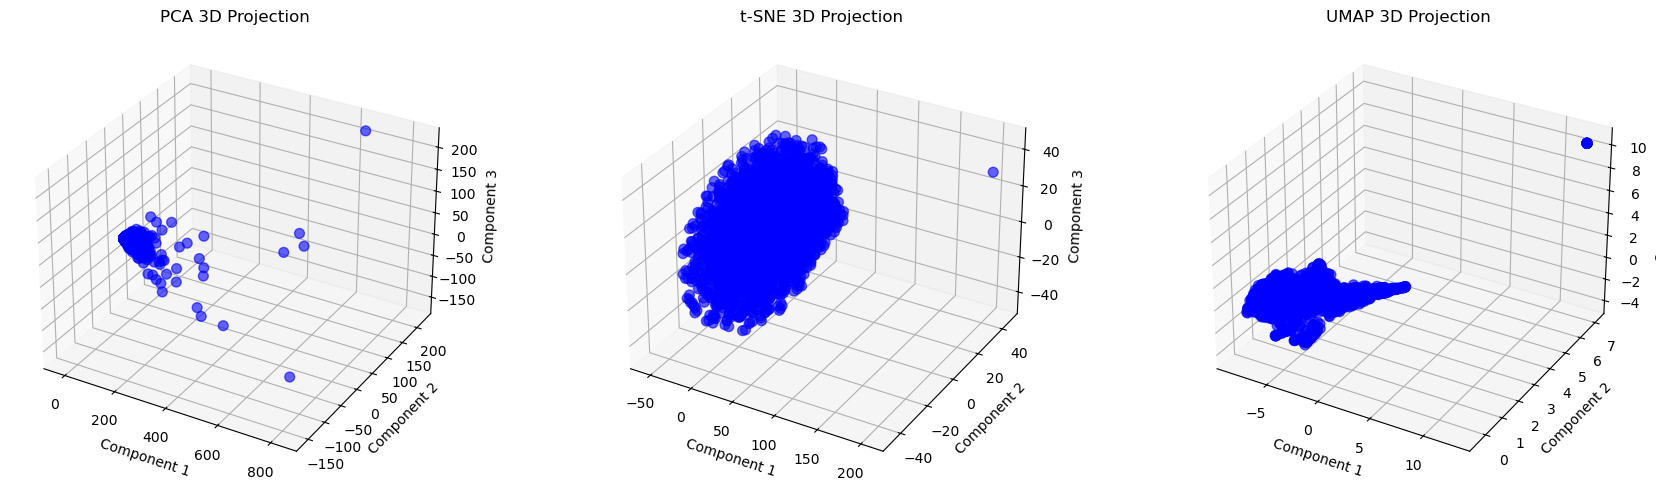

In [61]:
from mpl_toolkits.mplot3d import Axes3D

X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

def plot_3d(data, title, ax):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', s=50, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

# Create a 3D plot for each embedding
fig = plt.figure(figsize=(18, 5))

# 1. PCA 3D plot
ax1 = fig.add_subplot(131, projection='3d')
plot_3d(X_pca_aug, 'PCA 3D Projection', ax1)

# 2. t-SNE 3D plot
ax2 = fig.add_subplot(132, projection='3d')
plot_3d(X_tsne_aug, 't-SNE 3D Projection', ax2)

# 3. UMAP 3D plot
ax3 = fig.add_subplot(133, projection='3d')
plot_3d(X_umap_aug, 'UMAP 3D Projection', ax3)

# Display the plots
plt.tight_layout()
plt.show()

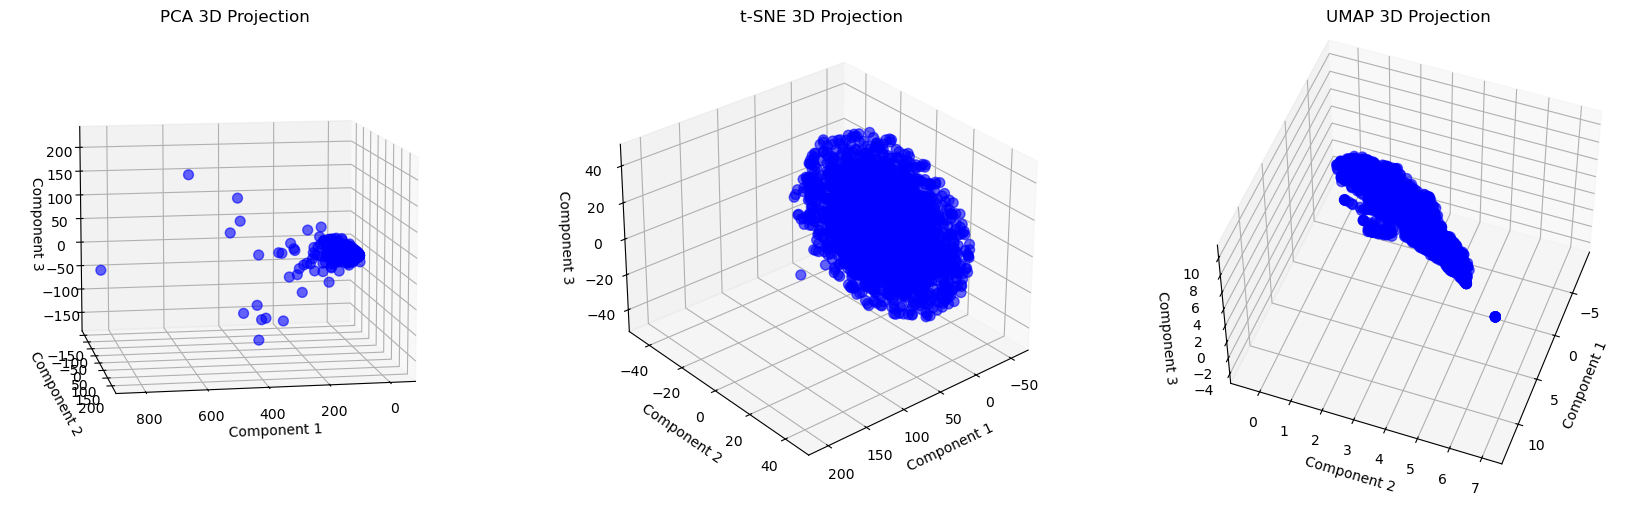

In [62]:
# Create a 3D plot for each embedding
fig = plt.figure(figsize=(18, 5))

# 1. PCA 3D plot
ax1 = fig.add_subplot(131, projection='3d')
plot_3d(X_pca_aug, 'PCA 3D Projection', ax1)

# 2. t-SNE 3D plot
ax2 = fig.add_subplot(132, projection='3d')
plot_3d(X_tsne_aug, 't-SNE 3D Projection', ax2)

# 3. UMAP 3D plot
ax3 = fig.add_subplot(133, projection='3d')
plot_3d(X_umap_aug, 'UMAP 3D Projection', ax3)

# Display the plots
plt.tight_layout()

# elev是高度，azim為與垂直軸的角度
ax1.view_init(elev=10, azim=80)
ax2.view_init(elev=30, azim=50)
ax3.view_init(elev=50, azim=20)
plt.show()

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [63]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_hw'] = mlb.transform(X['category_name']).tolist()
# Yes, it also work!!
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  \
0              comp.graphics   
1              comp.graphics   
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
...                      ...   
2252                 sci.med   
2253                 sci.med   
2254                 sci.med   
2255                 sci.med   
2256                 sci.med   

                                               unigrams  \
0     [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1     [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2     [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3     [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4     [From, :, stanly, @, grok11.columbiasc.ncr.com...   
...                                                 ...   
2252  [From, :, roos, @, Operoni.Helsinki.FI, (, Chr...   
2253  [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...   
2254  [From, :, sasghm, @, theseus.unx.sas.com, (, G...   
2255  [From, :, Dan, Wallach, <, dwallach, @, cs.ber...   
2256  [From, :, dyer, @, spdcc.com, (, Steve, Dyer, ...   

                                         tokenized_text bin_category_hw  
0     {Subject:, LaserJet, Collier), London,, conver...    [0, 1, 0, 0]  
1     {Subject:, 'gurus', somewhere, 2d., Of, To, he...    [0, 1, 0, 0]  
2     {=CSE, Your, inconceivable, agency, Darin, to,...    [0, 0, 0, 1]  
3     {Subject:, church, poland, Zwart), Organizatio...    [0, 0, 0, 1]  
4     {Subject:, equalivant, at, many, 15, <Apr.7.01...    [0, 0, 0, 1]  
...                                                 ...             ...  
2252  {very, Subject:, University, /O=Helsinki/A=fum...    [0, 0, 1, 0]  
2253  {Jennifer, (even, Chief, winter, medical, bout...    [0, 0, 1, 0]  
2254  {6., A, (cortisone?), to, red, gift, relieved,...    [0, 0, 1, 0]  
2255  {Various, c+health, lubricate, For, does, arou...    [0, 0, 1, 0]  
2256  {Subject:, article, with, events., Berkeley., ...    [0, 0, 1, 0]  

[2257 rows x 6 columns]

## **Second: Process on New Datasets**

In [116]:
from datasets import load_dataset
import pandas as pd
import numpy as np

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
type(ds)

datasets.dataset_dict.DatasetDict

In [117]:
ds['train'][:1]

{'sentiment': ['not nostalgia'],
 'comment': ['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.']}

In [118]:
# datasets convert to dataframe
df_X = pd.DataFrame(ds['train'])
df_X['comment'][:10]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [119]:
# comments check
for s in df_X['comment'][0:3]:
    print(s)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


In [120]:
import helpers.data_mining_helpers as dmh
# missing value check
df_X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [121]:
# check duplicated
sum(df_X.duplicated()) # duplicated exist = 1
df_X.drop_duplicates(keep="last", inplace=True) # inplace applies changes directly on our dataframe
len(df_X)

1499

### ***df.drop_duplicates(keep=False, inplace=True) 不太正確，重複的應該要留一個下來，而不是全部刪掉***

sentiment
not nostalgia    101
nostalgia         99
Name: count, dtype: int64


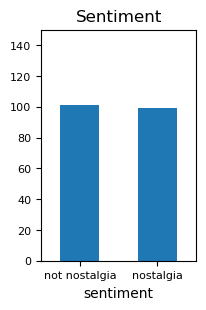

In [122]:
# sample from dataframe
import matplotlib.pyplot as plt
df_sample = df_X.sample(n=200) #random state
print(df_sample.sentiment.value_counts())
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment',
                                    ylim = [0, 150],        
                                    rot = 0, fontsize = 8, figsize = (2,3))
plt.show()

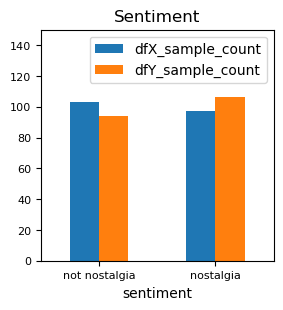

In [123]:
dfx_sample = df_X.sample(200).sentiment.value_counts()
dfy_sample = df_X.sample(200).sentiment.value_counts()
combined_df = pd.concat([dfx_sample, dfy_sample], axis=1)
combined_df.columns = ['dfX_sample_count', 'dfY_sample_count']
combined_df.plot(kind = 'bar',
                 title = 'Sentiment',
                 ylim = [0, 150], 
                 rot = 0, fontsize = 8, figsize = (3,3),)
plt.show()

In [124]:
import nltk

In [125]:
# takes a like a minute or two to process
nltk.download('punkt_tab')
df_X['unigram'] = df_X['comment'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\JIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [126]:
df_X['unigram'][0:2]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
Name: unigram, dtype: object

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_count = count_vect.fit_transform(df_X.comment) #learn the vocabulary and return document-term matrix
count_vect.get_feature_names_out()[::100]

array(['00', '3rd', 'affair', 'army', 'be', 'bond', 'captial', 'clapping',
       'contemporaries', 'dates', 'dj', 'effort', 'excuse', 'find',
       'funner', 'grandfather', 'headache', 'hums', 'island', 'kray',
       'lock', 'masterpiece', 'moments', 'nine', 'paid', 'player',
       'quality', 'remembered', 'ruined', 'sexuality', 'skipper', 'start',
       'superstar', 'this', 'truly', 'veronica', 'went', 'yardbirds'],
      dtype=object)

In [128]:
for i,t in enumerate(df_count[1,:1000].toarray()[0]):
    if t == 1:
        print(count_vect.get_feature_names_out()[i:i+1])

['an']
['and']
['angel']
['beautiful']


In [129]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:1000]]

In [130]:
plot_y = ["comment_"+ str(i) for i in list(df_X.index)[0:50]]

In [131]:
plot_z = df_count[0:50, 0:1000].toarray()

(50, 117)


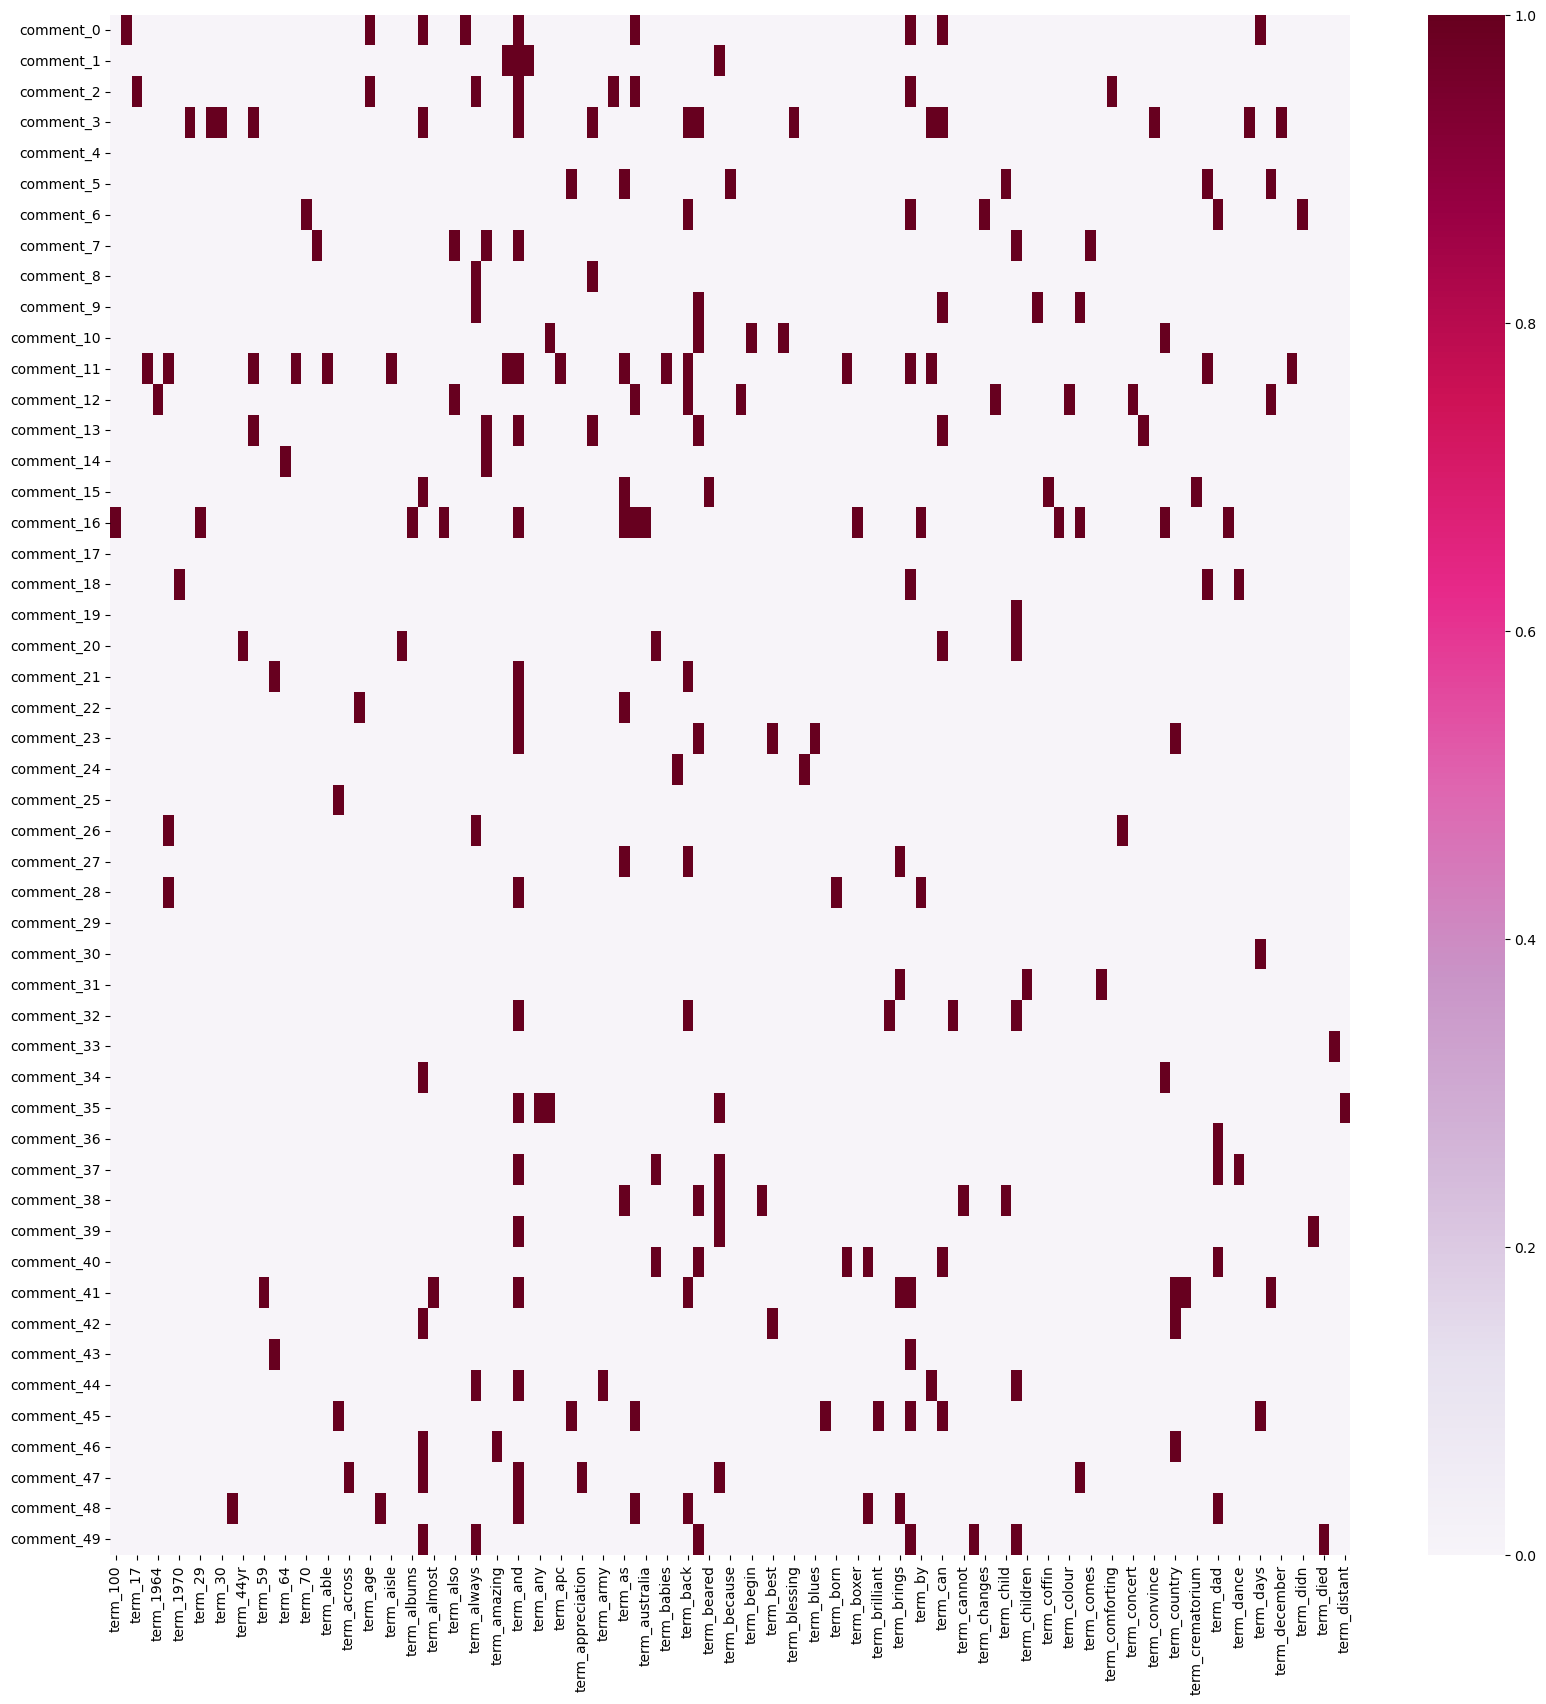

In [132]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

df_sum = df_todraw.sum(axis=0)
# 保留 1 的總數大於等於 1 的列
df_filtered = df_todraw.loc[:, df_sum >= 1]
print(df_filtered.shape)

plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_filtered,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)
plt.show()

In [133]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_count.shape[1]):
    term_frequencies.append(sum(df_count[:,j].toarray()))

In [134]:
import numpy as np
term_frequencies = np.asarray(df_count.sum(axis=0))[0]

C:\Users\JIN\AppData\Local\Temp\ipykernel_11636\2456979796.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



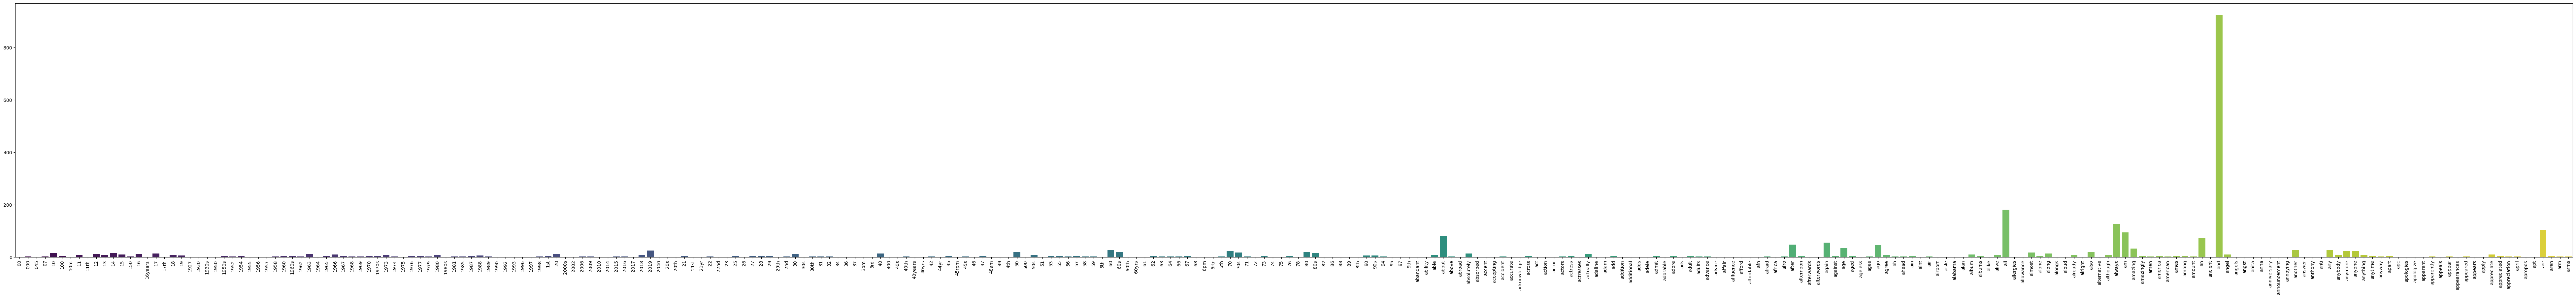

In [135]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
                y=term_frequencies[:300],
                hue=count_vect.get_feature_names_out()[:300],
                palette="viridis")
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

In [136]:
import plotly.express as px
import pandas as pd

# sum the frequency of each term, 
df_sum = df_todraw.sum(axis=0)
df_filtered = df_todraw.loc[:, df_sum >= 1]
df_filtered_sum = df_filtered.sum(axis=0)
df_filtered_sum_sorted = df_filtered_sum.sort_values(ascending=False)

# Create a DataFrame to organize the data
df_plot = pd.DataFrame({
    'Term': df_filtered_sum_sorted.index,
    'Frequency': df_filtered_sum_sorted.values
})

# Create the bar plot using Plotly
fig = px.bar(df_plot, x='Term', y='Frequency')

# Update layout (rotating labels, sizing, etc.)
fig.update_layout(
    xaxis_tickangle=90,  # Rotate x-axis labels
    height=500,  # Set figure height
    width=1200,  # Set figure width
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

# Show the figure
fig.show()

In [219]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df_X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df_X[df_X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_count = count_vect.fit_transform(df_X['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_count.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


['not nostalgia' 'nostalgia']


In [139]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1494   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
1         0         0        0    0    0    0        0      0  
2         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
4         0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494      0         0        0    0    0    0        0      0  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  
1497      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[1499 rows x 3730 columns]

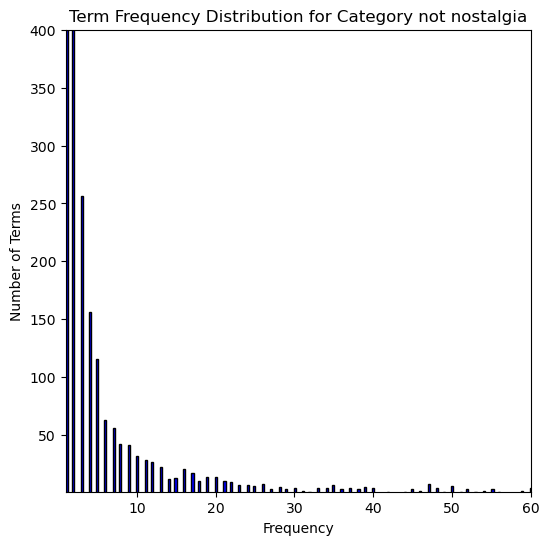

In [140]:
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(6, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 60)
plt.ylim(1, 400)
plt.show()

In [246]:
category_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
print(sorted_counts.shape)

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

(3730,)
Category: not nostalgia
Number of terms in top 5%: 186
Filtered terms: ['00', 'masculine', 'massively', 'master', 'masterpieces', 'masters', 'matched', 'mate', 'marvin', 'material', 'matters', 'mcdonald', 'measure', 'medal', 'mederios', 'media', 'medicine', 'materialistic', 'mediterranean', 'marvellous', 'mark', 'maggie', 'magnificently', 'mail', 'maine', 'maker', 'malinda', 'managed', 'maro', 'managing', 'mangle', 'manhood', 'mankind', 'mant', 'mardi', 'marie', 'marin', 'mandolin', 'meeting', 'melbourne', 'mellowed', 'milestone', 'millennium', 'miller', 'miming', 'minds', 'minehead', 'mingo', 'miles', 'mining', 'mist', 'mistakes', 'misunderstood', 'mitch', 'mock', 'mocking', 'moms', 'miracles', 'microphones', 'microphone', 'miami', 'melodic', 'melodica', 'melodrama', 'melt', 'melted', 'melting', 'memorize', 'memorized', 'mended', 'mendes', 'merle', 'merry', 'mesmerized', 'mesmerizes', 'mess', 'messed', 'meta', 'madrid', 'monday', 'maddox', 'macias', 'latina', 'laughs', 'lawyer

In [142]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


000  045  07  10  100  10m  11  11th  12  13  ...  yours  yourself  \
0       0    0   0   0    0    0   0     0   0   0  ...      0         0   
1       0    0   0   0    0    0   0     0   0   0  ...      0         0   
2       0    0   0   0    0    0   0     0   0   0  ...      0         0   
3       0    0   0   0    0    0   0     0   0   0  ...      0         0   
4       0    0   0   0    0    0   0     0   0   0  ...      0         0   
...   ...  ...  ..  ..  ...  ...  ..   ...  ..  ..  ...    ...       ...   
1494    0    0   0   0    0    0   0     0   0   0  ...      0         0   
1495    0    0   0   0    0    0   0     0   0   0  ...      0         0   
1496    0    0   0   0    0    0   0     0   0   0  ...      0         0   
1497    0    0   0   0    0    0   0     0   0   0  ...      0         0   
1498    0    0   0   0    0    0   0     0   0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
1         0         0        0    0    0    0        0      0  
2         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
4         0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494      0         0        0    0    0    0        0      0  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  
1497      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[1499 rows x 3507 columns]

In [ ]:
from PAMI.extras.convert._DF2DB import _DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


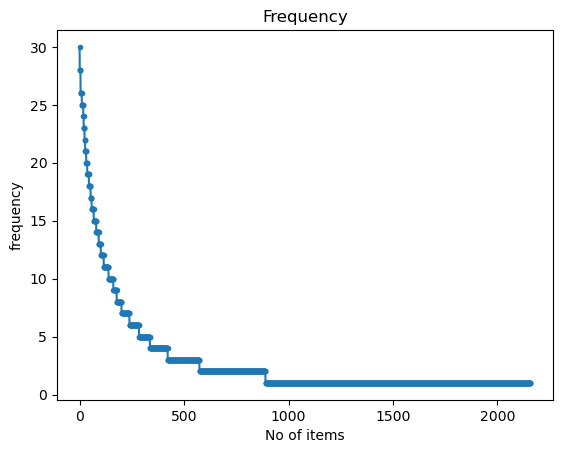

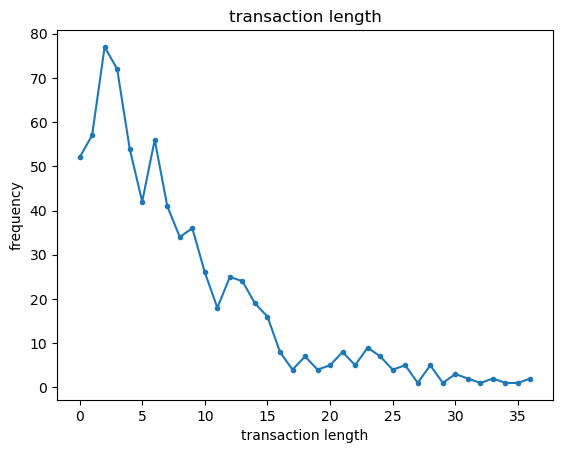

In [143]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


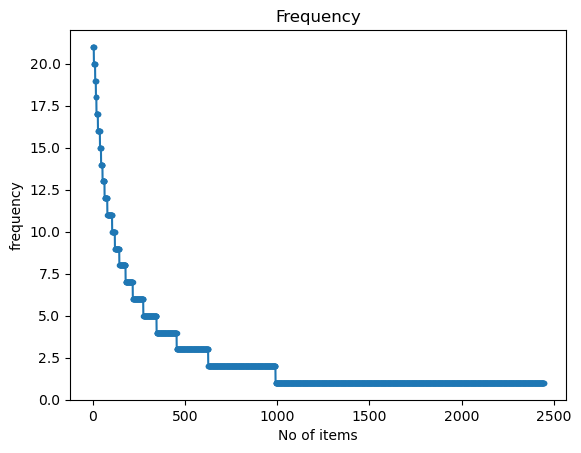

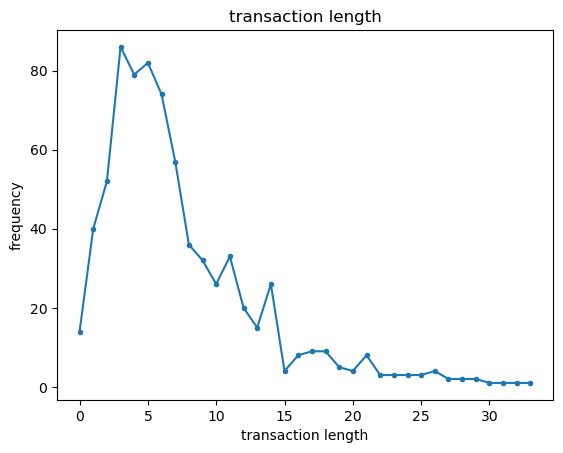

In [144]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [145]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.018998384475708008


In [146]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [147]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.010996580123901367


In [148]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [149]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [150]:
df_X.columns

Index(['sentiment', 'comment', 'unigram'], dtype='object')

In [155]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df_X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df_X['tokenized_comment'] = df_X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df_X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1499 rows x 3950 columns]

In [167]:
import PAMI.frequentPattern.topk.FAE as alg
def mine_patterns(input_file, file_name,max_iterations=3, step_size=250):

    for n in range(1, max_iterations + 1):
        k = step_size * n
        obj = alg.FAE(iFile=input_file, k=k)
        obj.mine()
        
        # Get patterns as a DataFrame
        frequent_patterns_df = obj.getPatternsAsDataFrame()
        
        # Output results
        print(f"Iteration {n}:")
        print(f"Total No of patterns: {len(frequent_patterns_df)}")
        print(f"Runtime: {obj.getRuntime()} seconds")
        print("-" * 50)
        obj.save(f'freq_patterns_{file_name}_FAE{k}.txt') #save the patterns

# Call the function
mine_patterns(input_file='td_freq_db_nostalgia.csv',file_name='nostalgia')
mine_patterns(input_file='td_freq_db_not nostalgia.csv',file_name='not nostalgia')   

 TopK frequent patterns were successfully generated using FAE algorithm.
Iteration 1:
Total No of patterns: 250
Runtime: 0.04500102996826172 seconds
--------------------------------------------------
 TopK frequent patterns were successfully generated using FAE algorithm.
Iteration 2:
Total No of patterns: 500
Runtime: 0.18217682838439941 seconds
--------------------------------------------------
 TopK frequent patterns were successfully generated using FAE algorithm.
Iteration 3:
Total No of patterns: 750
Runtime: 0.5801386833190918 seconds
--------------------------------------------------
 TopK frequent patterns were successfully generated using FAE algorithm.
Iteration 1:
Total No of patterns: 250
Runtime: 0.053510189056396484 seconds
--------------------------------------------------
 TopK frequent patterns were successfully generated using FAE algorithm.
Iteration 2:
Total No of patterns: 500
Runtime: 0.1441490650177002 seconds
--------------------------------------------------
 

In [168]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

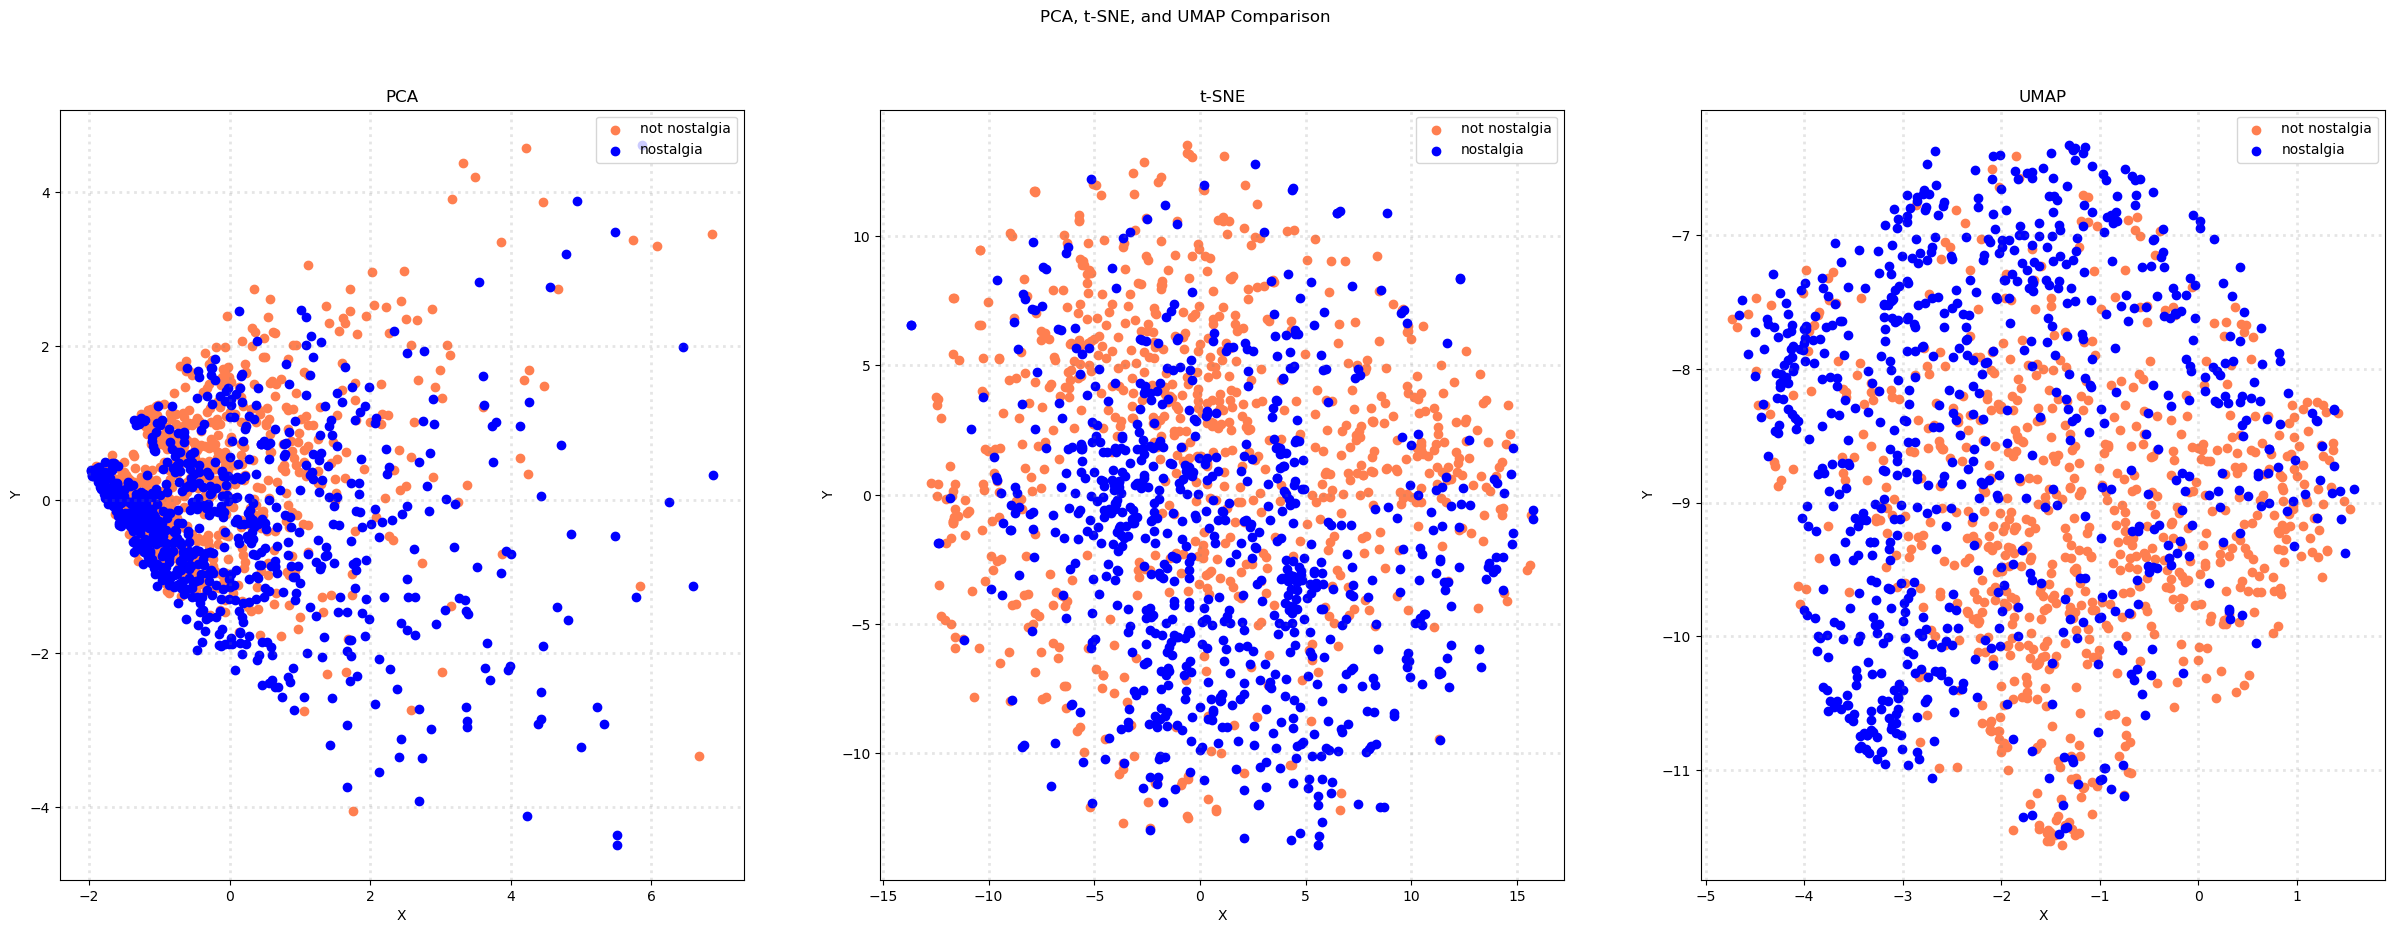

In [170]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df_X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [171]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

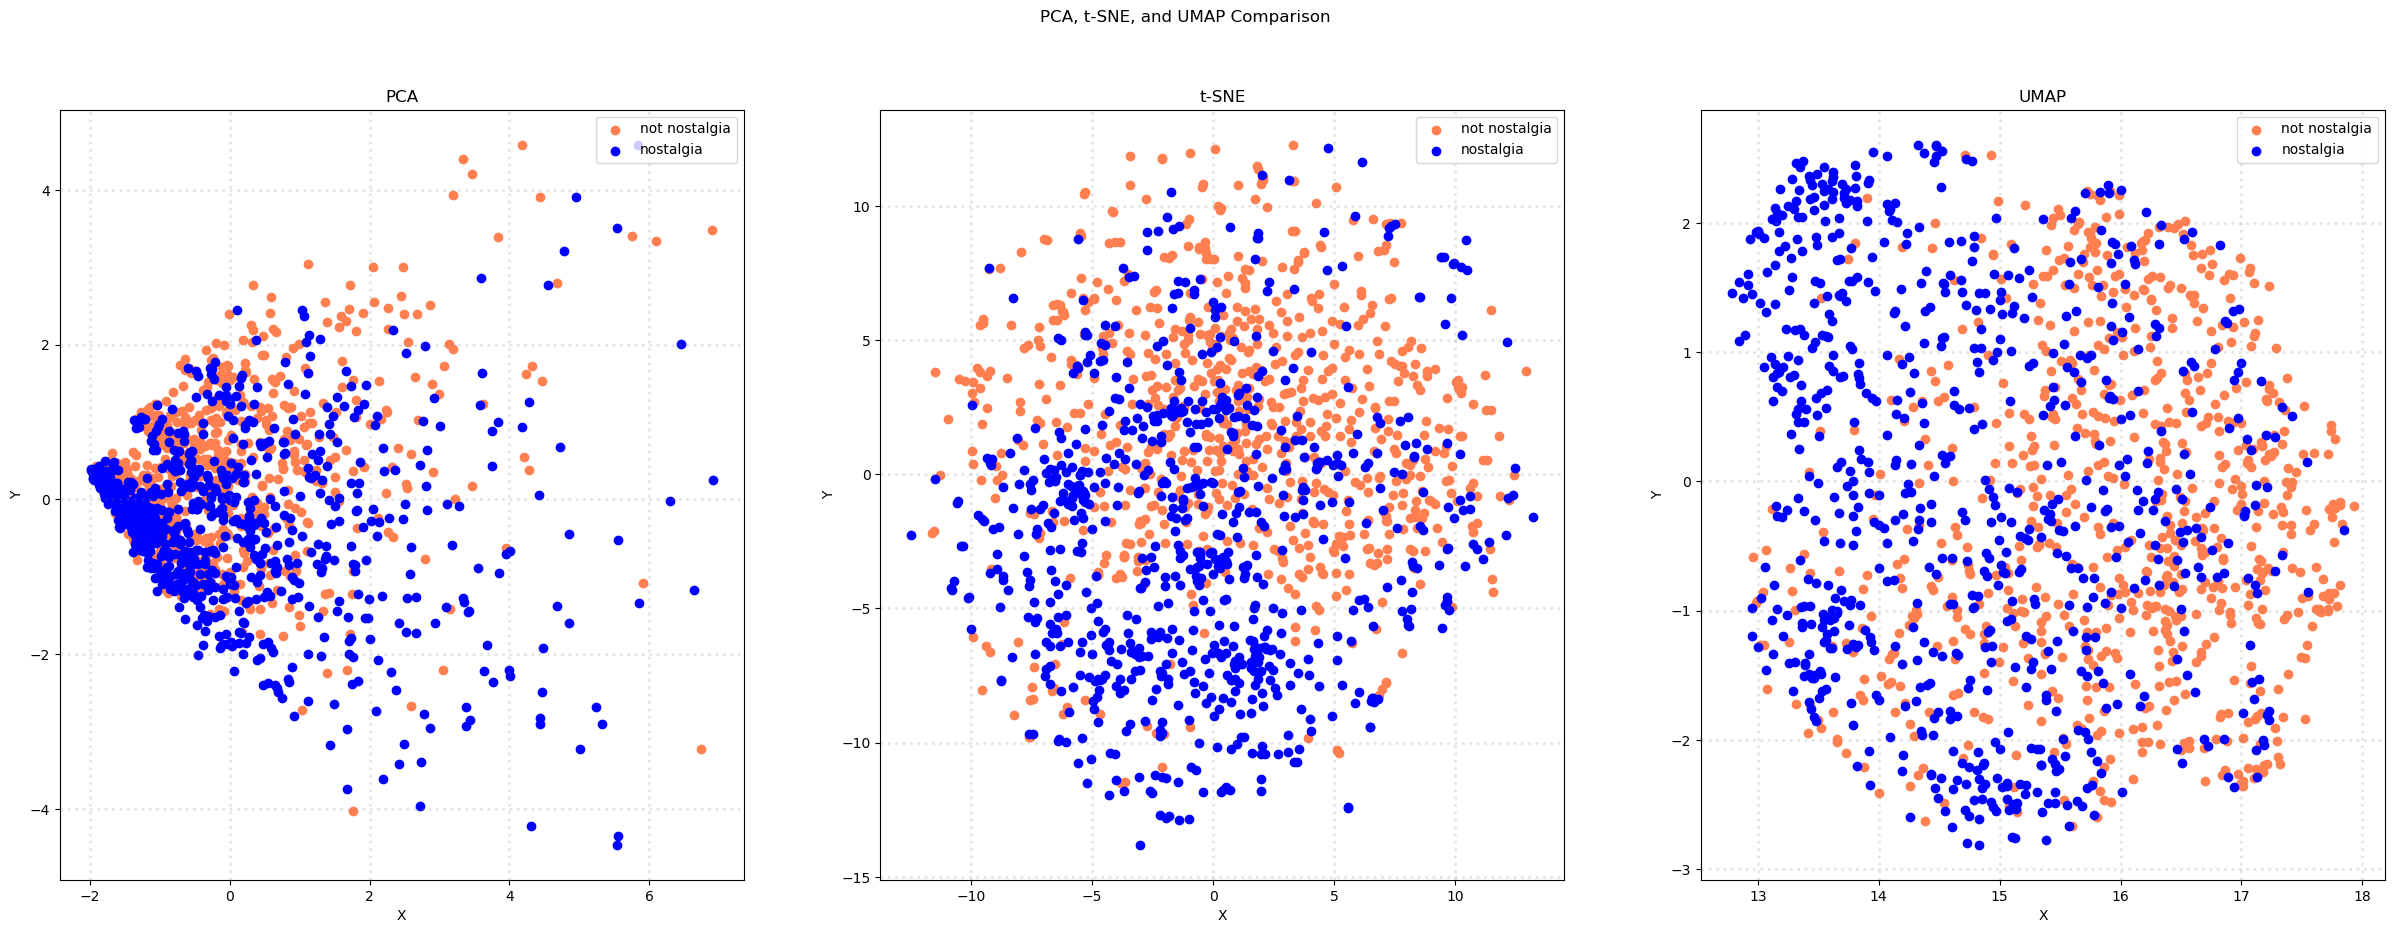

In [173]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df_X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

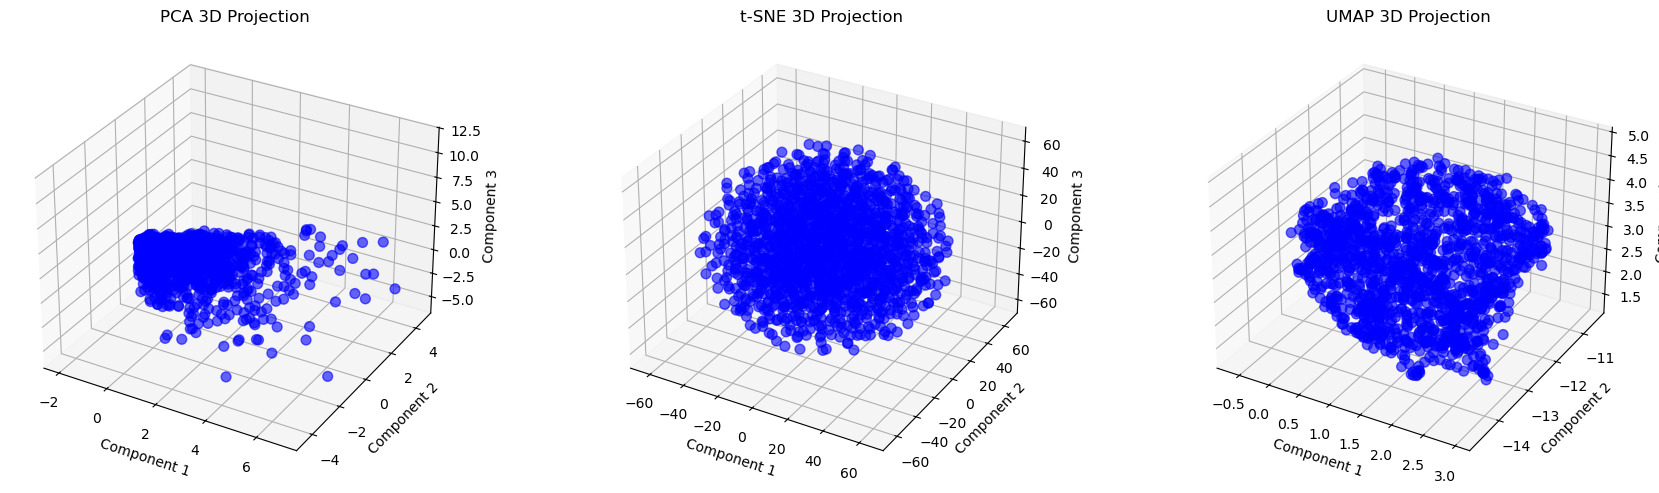

In [174]:
from mpl_toolkits.mplot3d import Axes3D

X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

def plot_3d(data, title, ax):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', s=50, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

# Create a 3D plot for each embedding
fig = plt.figure(figsize=(18, 5))

# 1. PCA 3D plot
ax1 = fig.add_subplot(131, projection='3d')
plot_3d(X_pca_aug, 'PCA 3D Projection', ax1)

# 2. t-SNE 3D plot
ax2 = fig.add_subplot(132, projection='3d')
plot_3d(X_tsne_aug, 't-SNE 3D Projection', ax2)

# 3. UMAP 3D plot
ax3 = fig.add_subplot(133, projection='3d')
plot_3d(X_umap_aug, 'UMAP 3D Projection', ax3)

# Display the plots
plt.tight_layout()
plt.show()

In [175]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [176]:
mlb = preprocessing.LabelBinarizer()

In [179]:
mlb.fit(df_X.sentiment)

LabelBinarizer()

In [180]:
df_X['bin_category'] = mlb.transform(df_X['sentiment']).tolist()

In [181]:
df_X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                             unigram  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_category  
0  {for, golden, with, singer, those, that, but,,...          [1]  
1  {The, ever, kid, voice, I, of, to, when, his, ...          [0]  
2  {simple, loving, town, with, Mr., find, Jesus,...          [0]  
3  {for, pray, 1st, that, This, tour, receive., h...          [1]  
4  {me, my, who, of, to, played, mum, everyday, h...          [0]  
5  {me, child,, over, that, appreciate, funerals....          [0]  
6  {for, me, then,, dad, listening, My, I, things...          [0]  
7  {me, TO, with, comes, since, I, he, to, 71, fe...          [0]  
8        {always, heart, are, you, in, my, Wherever}          [1]

In [187]:
# create a new column represent sentiment type
df_X['category'] = df_X['sentiment'].map({'not nostalgia':0, 'nostalgia':1})
df_X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                                unigram  \
0     [He, was, a, singer, with, a, golden, voice, t...   
1     [The, mist, beautiful, voice, ever, I, listene...   
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3     [30, day, leave, from, 1st, tour, in, Viet, Na...   
4     [listening, to, his, songs, reminds, me, of, m...   
...                                                 ...   
1495  [i, do, n't, know, !, .., but, the, opening, o...   
1496  [it, 's, sad, this, is, such, a, beautiful, so...   
1497  [Dear, Friend, ,, I, think, age, and, time, is...   
1498  [I, was, born, in, 1954, and, started, to, be,...   
1499  [This, is, the, first, CD, I, bought, after, m...   

                                      tokenized_comment bin_category  category  
0     {for, golden, with, singer, those, that, but,,...          [1]         0  
1     {The, ever, kid, voice, I, of, to, when, his, ...          [0]         1  
2     {simple, loving, town, with, Mr., find, Jesus,...          [0]         1  
3     {for, pray, 1st, that, This, tour, receive., h...          [1]         0  
4     {me, my, who, of, to, played, mum, everyday, h...          [0]         1  
...                                                 ...          ...       ...  
1495  {don't, thing, on, that, suggest, painter, him...          [1]         0  
1496  {really, afraid, to, tell, when, love, and, su...          [1]         0  
1497  {that, not, comes, I, Dear, to, time, age, whe...          [1]         0  
1498  {5, emulate, 1954, others, This, really, have,...          [0]         1  
1499  {turning, 21, years., very, This, marriage, I,...          [0]         1  

[1499 rows x 6 columns]

In [196]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df_X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_X['sentiment'], test_size=0.3, random_state=42)

In [197]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [198]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0         0   
423    0    0    0   0   0    0    0   0     0   0  ...      0         0   
414    0    0    0   0   0    0    0   0     0   0  ...      0         0   
452    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1084   0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
651    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1117      0         0        0    0    0    0        0      0  
1396      0         0        0    0    0    0        0      0  
423       0         0        0    0    0    0        0      0  
414       0         0        0    0    0    0        0      0  
452       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1084      0         0        0    0    0    0        0      0  
991       0         0        0    0    0    0        0      0  
651       0         0        2    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [199]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8162    0.9569    0.8810       232
    nostalgia     0.9438    0.7706    0.8485       218

     accuracy                         0.8667       450
    macro avg     0.8800    0.8638    0.8647       450
 weighted avg     0.8780    0.8667    0.8652       450



In [200]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df_X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_X['sentiment'], test_size=0.3, random_state=42)

In [201]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8577777777777778

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8111    0.9440    0.8725       232
    nostalgia     0.9278    0.7661    0.8392       218

     accuracy                         0.8578       450
    macro avg     0.8694    0.8550    0.8559       450
 weighted avg     0.8676    0.8578    0.8564       450



## **Third:Complete following tasks**
1. Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
2. Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn guide .
3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. Refer to this article.

### data visualizations
- Since the dataset is about comment, wordcloud is good at showing what words related to nostalgia or non nostalgia pattern
- Thanks to previous PAMI analysis, I successfully observe some patterns from wordcloud. for example, "elvis" is a famous singer in 1950s and in word cloud we see it really related to not nostalgia. It is really counter-intuitive. I also went back to check my code and dataset. Most of the comment contend "elvis" are labeled "not nostalgia". From this point, I guess nowaday people use "elvis" not to remember him.

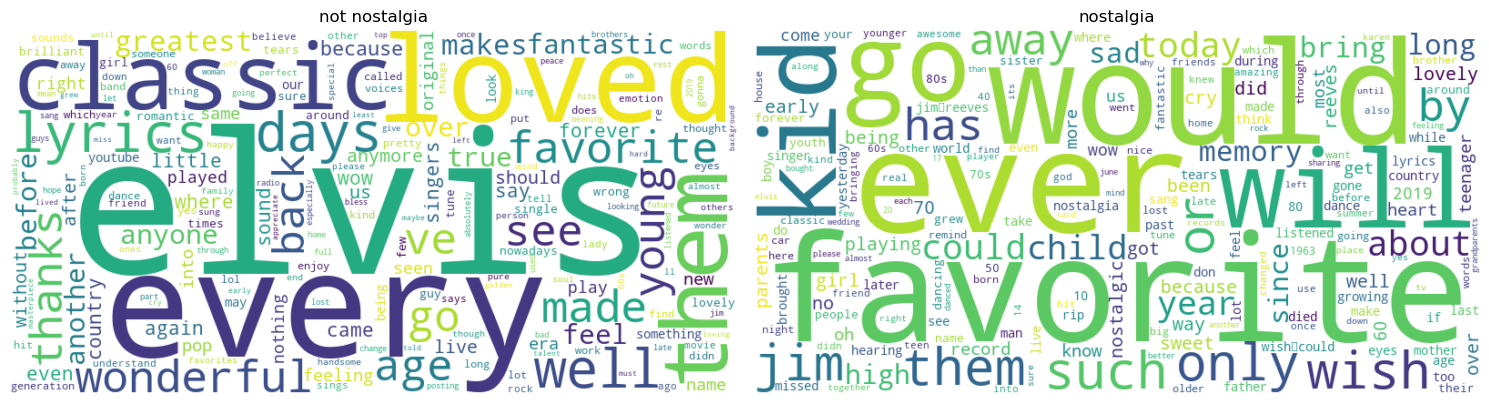

In [218]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud_from_file(file_path):
    # Step 1: Read the file and split lines
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Step 2: Split each line into 'word' and 'support'
    data = [line.strip().split(':') for line in lines]

    # Step 3: Convert to DataFrame
    df = pd.DataFrame(data, columns=['word', 'support'])

    # Convert 'support' to numeric
    df['support'] = pd.to_numeric(df['support'], errors='coerce')

    # Convert DataFrame to dictionary
    word_support_dict = pd.Series(df.support.values, index=df.word).to_dict()

    # Step 4: Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_support_dict)

    return wordcloud

# Create word clouds from two different files
file1 = 'freq_patterns_not nostalgia_FAE250.txt'  # Replace with your first file path
file2 = 'freq_patterns_nostalgia_FAE250.txt'  # Replace with your second file path

wordcloud1 = create_wordcloud_from_file(file1)
wordcloud2 = create_wordcloud_from_file(file2)

# Step 5: Visualize the two word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('not nostalgia')

axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('nostalgia')

plt.tight_layout()
plt.show()


---
### TF-IDF

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Prepare a list of documents (text data)
comments_list = df_X['comment'].tolist()

# Step 2: Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Step 3: Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(comments_list)

# Step 4: Convert the matrix to a DataFrame for better readability
import pandas as pd

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Display the TF-IDF DataFrame
print(tfidf_df)

       00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  yout

---
### Naive Bayes Classifier
- Following, I observe MultinomialNB and BernoulliNB fit to dataset and result to better accuracy.
- GussianNB is not good at this dataset because it useful when working with continuous values while the dataset isn't continuous

In [243]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare your data
# Assuming df is your DataFrame and 'comment' is the text column, and 'label' is the target column
X = df_X['comment']  # Text data
y = df_X['sentiment']    # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Build Word Frequency Features
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
X_test_tfidf

<300x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2438 stored elements in Compressed Sparse Row format>

In [236]:
# Step 4: Train the Naive Bayes Classifier with TF-IDF Features
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Step 5: Train the Naive Bayes Classifier with Word Frequency Features
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)

# Step 6: Evaluate both models
# TF-IDF Model Evaluation
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("TF-IDF Model Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("TF-IDF Model Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Word Frequency Model Evaluation
y_pred_count = nb_count.predict(X_test_count)
print("Word Frequency Model Accuracy:", accuracy_score(y_test, y_pred_count))
print("Word Frequency Model Classification Report:\n", classification_report(y_test, y_pred_count))

TF-IDF Model Accuracy: 0.83
TF-IDF Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.79      0.92      0.85       157
not nostalgia       0.90      0.73      0.80       143

     accuracy                           0.83       300
    macro avg       0.84      0.83      0.83       300
 weighted avg       0.84      0.83      0.83       300

Word Frequency Model Accuracy: 0.8233333333333334
Word Frequency Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.78      0.92      0.84       157
not nostalgia       0.89      0.72      0.80       143

     accuracy                           0.82       300
    macro avg       0.84      0.82      0.82       300
 weighted avg       0.83      0.82      0.82       300



In [240]:
from sklearn.naive_bayes import BernoulliNB
# Step 4: Train the Naive Bayes Classifier with TF-IDF Features
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Step 5: Train the Naive Bayes Classifier with Word Frequency Features
nb_count = BernoulliNB()
nb_count.fit(X_train_count, y_train)

# Step 6: Evaluate both models
# TF-IDF Model Evaluation
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("TF-IDF Model Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("TF-IDF Model Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Word Frequency Model Evaluation
y_pred_count = nb_count.predict(X_test_count)
print("Word Frequency Model Accuracy:", accuracy_score(y_test, y_pred_count))
print("Word Frequency Model Classification Report:\n", classification_report(y_test, y_pred_count))

TF-IDF Model Accuracy: 0.8633333333333333
TF-IDF Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.85      0.90      0.87       157
not nostalgia       0.89      0.82      0.85       143

     accuracy                           0.86       300
    macro avg       0.87      0.86      0.86       300
 weighted avg       0.86      0.86      0.86       300

Word Frequency Model Accuracy: 0.8633333333333333
Word Frequency Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.85      0.90      0.87       157
not nostalgia       0.89      0.82      0.85       143

     accuracy                           0.86       300
    macro avg       0.87      0.86      0.86       300
 weighted avg       0.86      0.86      0.86       300



In [242]:
from sklearn.naive_bayes import GaussianNB
# Convert the TF-IDF sparse matrix to a dense array
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Convert the Count vectorizer sparse matrix to a dense array
X_train_count_dense = X_train_count.toarray()
X_test_count_dense = X_test_count.toarray()

# Step 4: Train the Gaussian Naive Bayes Classifier with TF-IDF Features
nb_tfidf = GaussianNB()
nb_tfidf.fit(X_train_tfidf_dense, y_train)

# Step 5: Train the Gaussian Naive Bayes Classifier with Word Frequency Features
nb_count = GaussianNB()
nb_count.fit(X_train_count_dense, y_train)

# Step 6: Evaluate both models
# TF-IDF Model Evaluation
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf_dense)
print("TF-IDF Model Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("TF-IDF Model Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Word Frequency Model Evaluation
y_pred_count = nb_count.predict(X_test_count_dense)
print("Word Frequency Model Accuracy:", accuracy_score(y_test, y_pred_count))
print("Word Frequency Model Classification Report:\n", classification_report(y_test, y_pred_count))

TF-IDF Model Accuracy: 0.6766666666666666
TF-IDF Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.65      0.85      0.73       157
not nostalgia       0.74      0.49      0.59       143

     accuracy                           0.68       300
    macro avg       0.70      0.67      0.66       300
 weighted avg       0.69      0.68      0.67       300

Word Frequency Model Accuracy: 0.6366666666666667
Word Frequency Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.60      0.89      0.72       157
not nostalgia       0.75      0.36      0.48       143

     accuracy                           0.64       300
    macro avg       0.68      0.62      0.60       300
 weighted avg       0.67      0.64      0.61       300



## **Fourth**
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

#### duplicate
In duplicate part, the master example shows delete all dummy duplicated data. However, in real world, we don't want all duplicate data being delete. Therefore, I change inplace parameter to False. As the result, I only delete one of the duplicated data.

In [234]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
dummy_df = pd.DataFrame(dummy_duplicate_dict)
dummy_df.drop_duplicates(keep='first', inplace=True)  # change parameter to keep='first', inplace=True
dummy_df

text  category   category_name
0  dummy record         1  dummy category

### noise, outlier handling
- Previously, we handled the outlier or noise by delete top and bottom 5% of frenquency data. Nevertheless, when I observed the data being filtered, it only included words that start with certain prefixes.